In [1]:
pip install pmdarima


  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


In [1]:
import pandas as pd
import numpy as np

## read data

In [2]:
df=pd.read_csv('C:/Users/SRTINNI/Desktop/TPW/Datasets/MaunaLoaDailyTemps.csv',index_col='DATE'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
#df

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


## plot the data

<AxesSubplot:xlabel='DATE'>

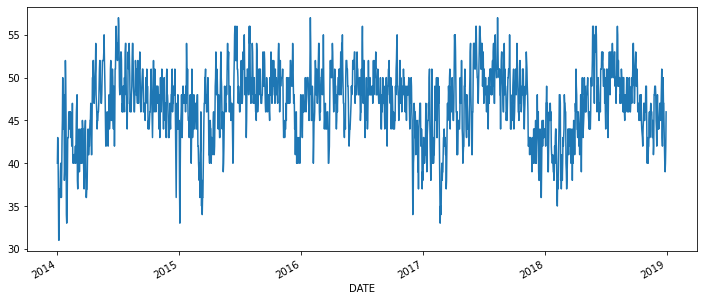

In [3]:
df['AvgTemp'].plot(figsize=(12,5))

In [4]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
    


C:\Users\SRTINNI\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### you only need to look at the p value. And you use the following simple method: If p< 0.05 ; Data is stationary and if p>0.05; Data is not stationary

In [5]:
ad_test(df['AvgTemp'])

1. ADF :  -6.554680125068785
2. P-Value :  8.675937480199322e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


## Figure out order for ARIMA model

In [6]:
from pmdarima import auto_arima
#ignore warnings
import warnings
warnings.filterwarnings("ignore") 

In [7]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
                          suppress_warnings=True)
#stepwise_fit.summery()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.751, Time=3.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.86 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.338, Time=3.65 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.631, Time=3.70 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.193, Time=3.63 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8311.209, Time=4.63 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.247, Time=4.68 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.546, Time=5.07 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.000, Time=4.50 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [8]:
from statsmodels.tsa.arima_model import ARIMA

### Split data into traning and testing 

In [9]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


### train the model

In [10]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Thu, 06 Jan 2022   AIC                           8156.395
Time:                        21:08:58   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (Q):                       37.95   Jarque-Bera (JB):                14.88
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make prediction on test set

In [11]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

pred.index=df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721546
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064
2018-12-15    45.961185
2018-12-16    45.970176
2018-12-17    45.979037
2018-12-18    45.987770
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021464
2018-12-23    46.029586
2018-12-24    46.037592
2018-12-25    46.045482
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075923
2018-12-30    46.083261
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='DATE'>

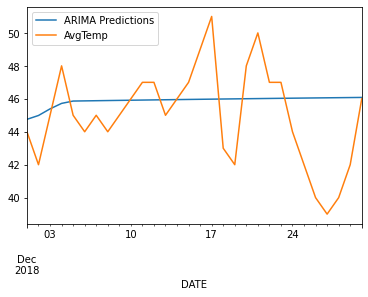

In [12]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [13]:
test['AvgTemp'].mean()

45.0

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463951305224


In [15]:
#from statsmodels.tsa.arima.model import ARIMA
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


### for future prediction 

In [16]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,type='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175341
2019-01-07    45.194274
2019-01-08    45.212942
2019-01-09    45.231349
2019-01-10    45.249498
2019-01-11    45.267393
2019-01-12    45.285038
2019-01-13    45.302436
2019-01-14    45.319591
2019-01-15    45.336505
2019-01-16    45.353183
2019-01-17    45.369628
2019-01-18    45.385842
2019-01-19    45.401830
2019-01-20    45.417593
2019-01-21    45.433137
2019-01-22    45.448462
2019-01-23    45.463574
2019-01-24    45.478474
2019-01-25    45.493165
2019-01-26    45.507651
2019-01-27    45.521934
2019-01-28    45.536017
2019-01-29    45.549904
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

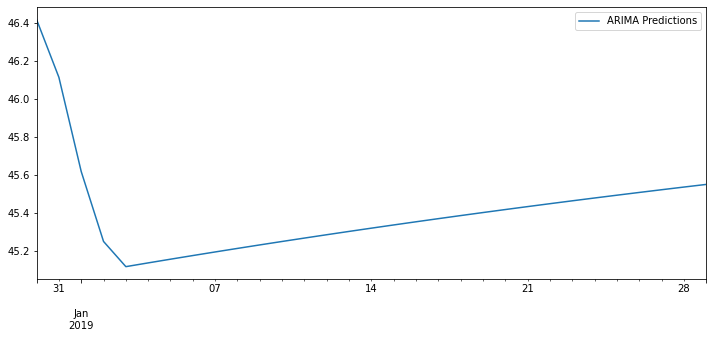

In [108]:
pred.plot(figsize=(12,5),legend=True)